In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS


In [4]:
dataset = pd.read_csv('../data/trainToxic.csv')

print(dataset.head())




                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  


In [5]:
print(dataset.shape)

(159571, 8)


In [6]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None


In [ ]:

print(dataset.isnull().sum())

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [ ]:
#finding the max and min length of the comment 
comment_lengths = dataset['comment_text'].apply(len)
print(comment_lengths.max())
print(comment_lengths.min())
print(comment_lengths.mean())



5000
6
394.07321505787394


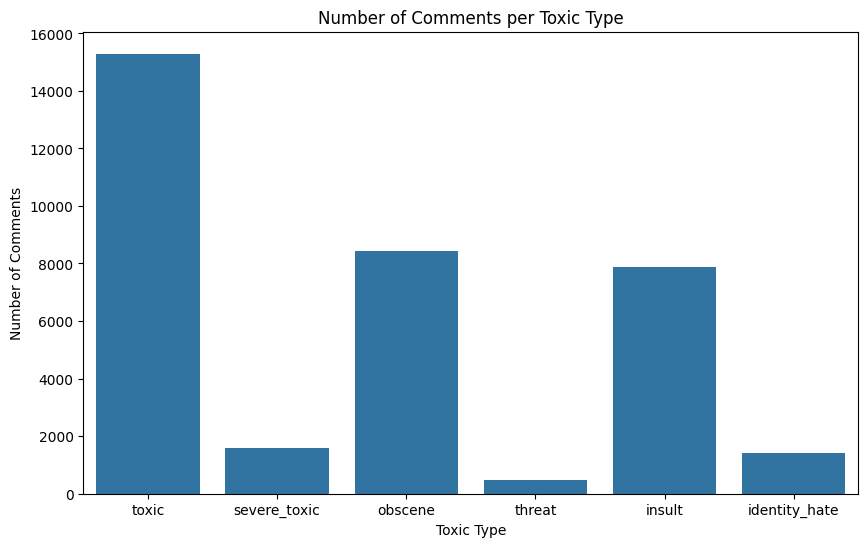

In [14]:

labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Plot count for each label
plt.figure(figsize=(10,6))
sns.barplot(x=labels, y=[dataset[label].sum() for label in labels])
plt.title("Number of Comments per Toxic Type")
plt.ylabel("Number of Comments")
plt.xlabel("Toxic Type")
plt.show()

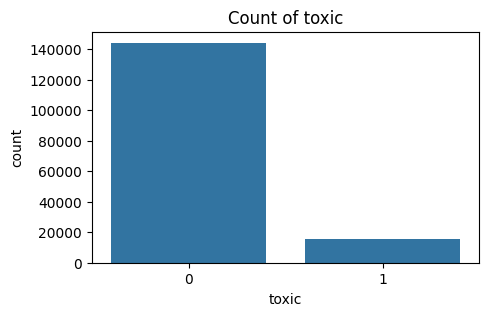

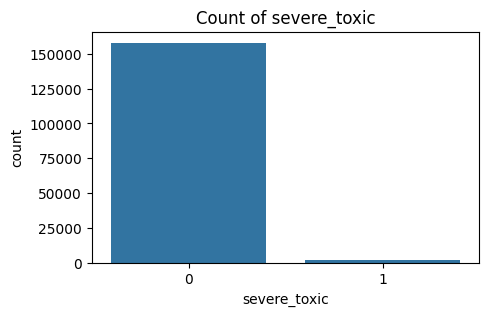

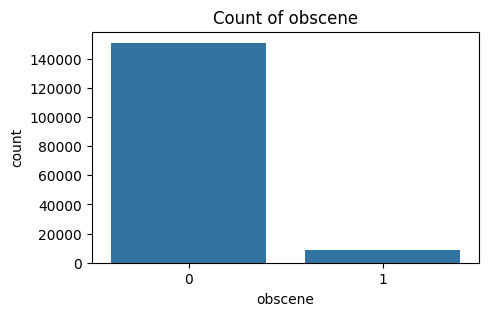

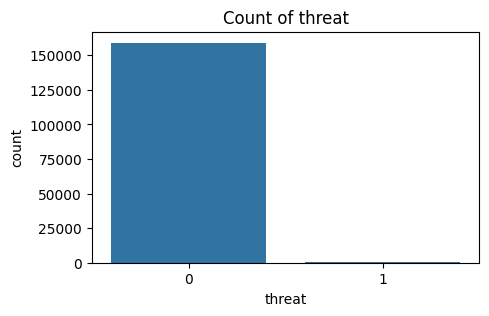

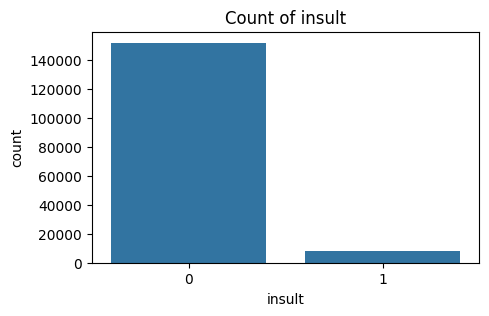

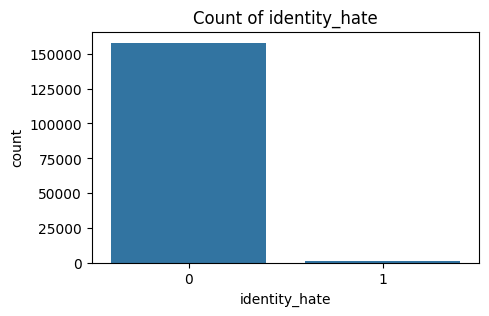

In [15]:
for label in labels:
    plt.figure(figsize=(5,3))
    sns.countplot(x=dataset[label])
    plt.title(f"Count of {label}")
    plt.show()

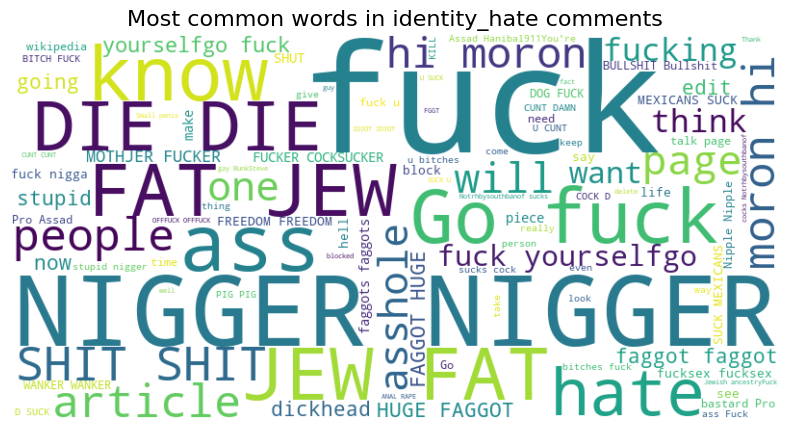

In [ ]:



text = []
for label in labels:
    text .append(" ".join(dataset[dataset[label] == 1]['comment_text'].astype(str)))
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    stopwords=STOPWORDS
).generate("".join(text))
    
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f"Most common words in comments", fontsize=16)
plt.show()

Checking if corrleation between categories linear or not 


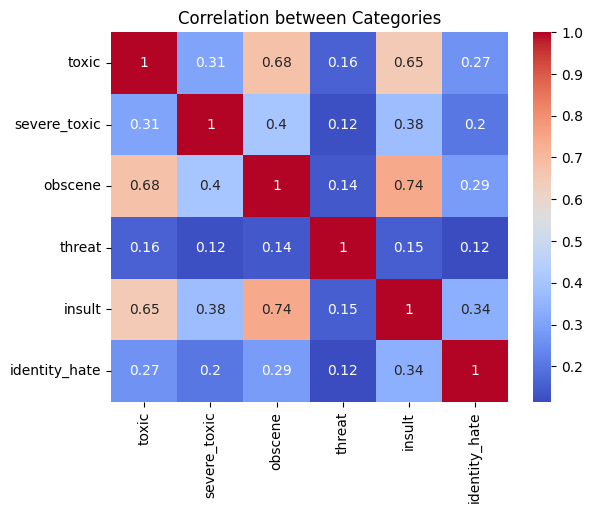

In [25]:
sns.heatmap(dataset[labels].corr(),annot=True,cmap='coolwarm')
plt.title('Correlation between Categories')
plt.show()

Toxic Obscene and insult are positively correlated 

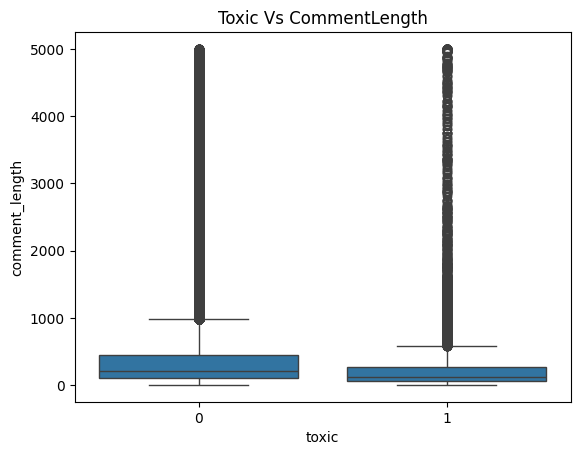

In [26]:
dataset['comment_length'] = dataset['comment_text'].apply(len)
sns.boxplot(x  = 'toxic',y = 'comment_length',data = dataset)
plt.title("Toxic Vs CommentLength")
plt.show()

Multiple Values are present in single row

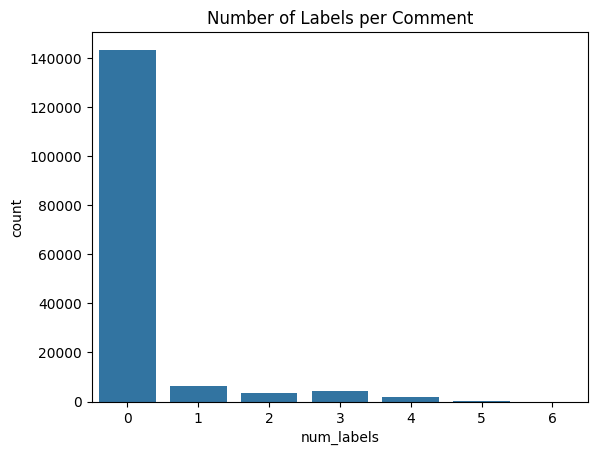

In [28]:
dataset['num_labels'] = dataset[labels].sum(axis=1)
sns.countplot(x='num_labels', data=dataset)
plt.title("Number of Labels per Comment")
plt.show()